# Preprocessing

<span style="color:red"># TODO:</span> Currently temporally concat all of fragmented. Need to do preprocessing in `preprocessing.ipynb`

# Analyze

- <span style="color:red"># TODO:</span> Analyze on Survey results might need to do more
- <span style="color:red"># TODO:</span> Currently only 3 Physiological signals from 1 nurse sample are being analyzed. Need: all signal, from all nurses, from all time to be analyzed
- <span style="color:red"># TODO:</span> Some data is missing (TDM 5)
- <span style="color:red"># TODO:</span> Data might have noise and outliers (TDM 6)

In [30]:
%pip install openpyxl seaborn matplotlib pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [49]:
import pandas as pd

# Load the survey data
survey_data = pd.read_excel('SurveyResults.xlsx', sheet_name=None)
all_surveys = pd.concat(survey_data.values(), ignore_index=True)
display(all_surveys.head())

,ID,Start time,End time,duration,date,Stress level,COVID related,Treating a covid patient,Patient in Crisis,Patient or patient's family,Doctors or colleagues,"Administration, lab, pharmacy, radiology, or other ancilliary services\n",Increased Workload,Technology related stress,Lack of supplies,Documentation,Competency related stress,Saftey (physical or physiological threats),Work Environment - Physical or others: work processes or procedures,Description
0,5C,08:00:00,09:00:00,01:00:00,2020-04-15,1,0,1,0,1,0,0,0,0,0,0,0,0,0,na
1,5C,17:31:00,17:58:00,00:27:00,2020-04-14,1,0,1,0,1,0,0,1,0,0,0,0,0,0,na
2,E4,15:32:00,15:37:00,00:05:00,2020-04-18,2,0,1,0,1,0,0,0,0,0,0,0,0,0,Spoke with family regarding patient's decline ...
3,E4,14:05:00,14:11:00,00:06:00,2020-04-18,2,0,0,0,1,0,0,0,0,0,0,0,0,0,Was placing another FaceTime call to a patient...
4,7A,13:52:00,14:03:00,00:11:00,2020-04-18,2,0,1,0,0,0,0,1,0,0,0,0,0,1,na


In [ ]:
import os

participant_folder = 'stress_dataset/15/15_1594140175'

eda_data = pd.read_csv(os.path.join(participant_folder, 'EDA.csv'), header=None, skiprows=2)
hr_data = pd.read_csv(os.path.join(participant_folder, 'HR.csv'), header=None, skiprows=2)
temp_data = pd.read_csv(os.path.join(participant_folder, 'TEMP.csv'), header=None, skiprows=2)

print("EDA Data:")
display(eda_data.head())

print("HR Data:")
display(hr_data.head())

print("Temperature Data:")
display(temp_data.head())

EDA Data:


,EDA
0,0.000000
1,0.032035
2,0.060226
3,0.067915
4,0.073040


HR Data:


,HR
0,83.00
1,83.00
2,83.67
3,87.25
4,81.80


Temperature Data:


,TEMP
0,30.13
1,30.13
2,30.13
3,30.13
4,30.13


In [39]:
print("EDA summary statistics:")
display(eda_data.describe())

print("HR summary statistics:")
display(hr_data.describe())

print("Temperature summary statistics:")
display(temp_data.describe())

EDA summary statistics:


,EDA
count,31224.000000
mean,1.710365
std,2.572627
min,0.000000
25%,0.210418
50%,0.558961
75%,1.982866
max,13.569088


HR summary statistics:


,HR
count,7797.000000
mean,88.697204
std,10.373430
min,56.830000
25%,81.470000
50%,87.720000
75%,94.580000
max,119.570000


Temperature summary statistics:


,TEMP
count,31224.000000
mean,32.486855
std,1.420000
min,29.450000
25%,31.190000
50%,32.130000
75%,33.810000
max,35.500000


# Visualize

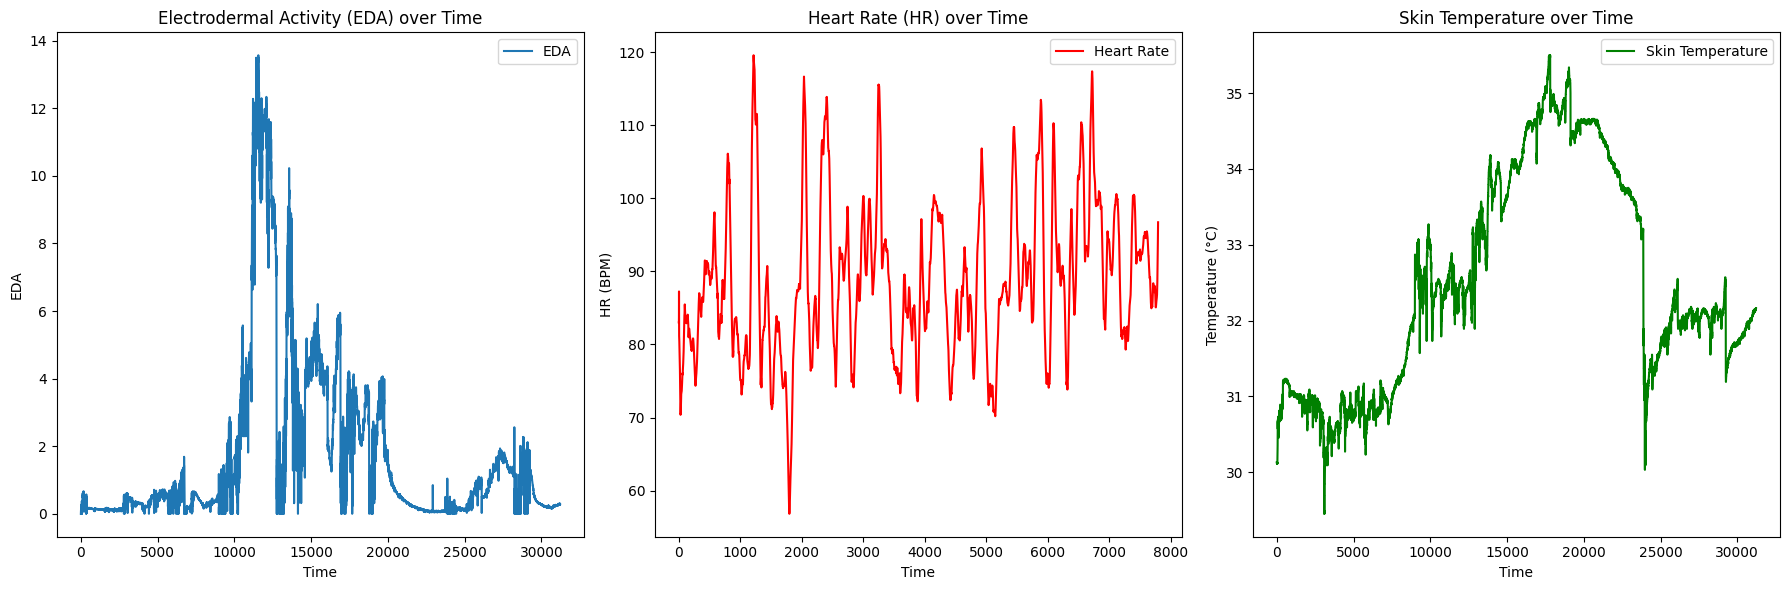

In [44]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].plot(eda_data, label='EDA')
axs[0].set_title('Electrodermal Activity (EDA) over Time')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('EDA')
axs[0].legend()

axs[1].plot(hr_data, label='Heart Rate', color='red')
axs[1].set_title('Heart Rate (HR) over Time')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('HR (BPM)')
axs[1].legend()

axs[2].plot(temp_data, label='Skin Temperature', color='green')
axs[2].set_title('Skin Temperature over Time')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Temperature (°C)')
axs[2].legend()

plt.tight_layout()
plt.show()

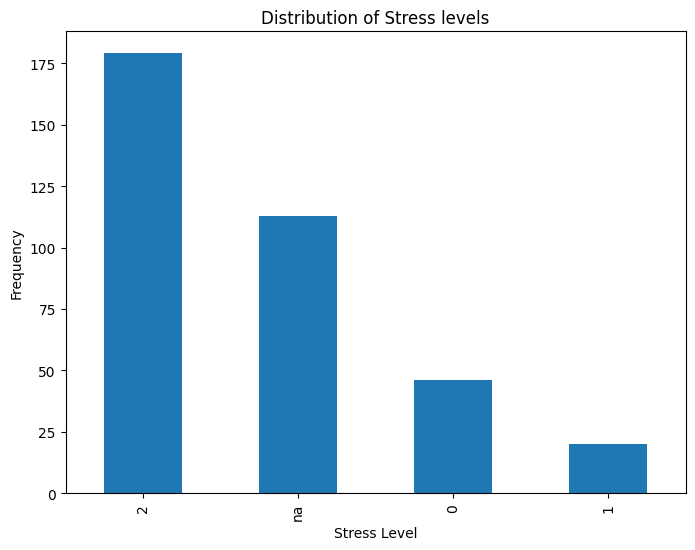

In [45]:
plt.figure(figsize=(8, 6))
all_surveys['Stress level'].value_counts().plot(kind='bar')
plt.title('Distribution of Stress levels')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()

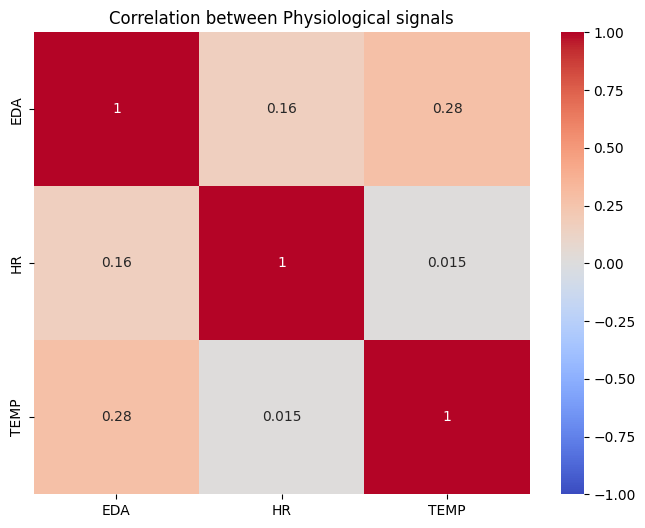

In [51]:
import seaborn as sns

eda_data.columns = ['EDA']
hr_data.columns = ['HR']
temp_data.columns = ['TEMP']
physio_data = pd.concat([eda_data, hr_data, temp_data], axis=1)

# Calculate correlation matrix
corr_matrix = physio_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Physiological signals')
plt.show()

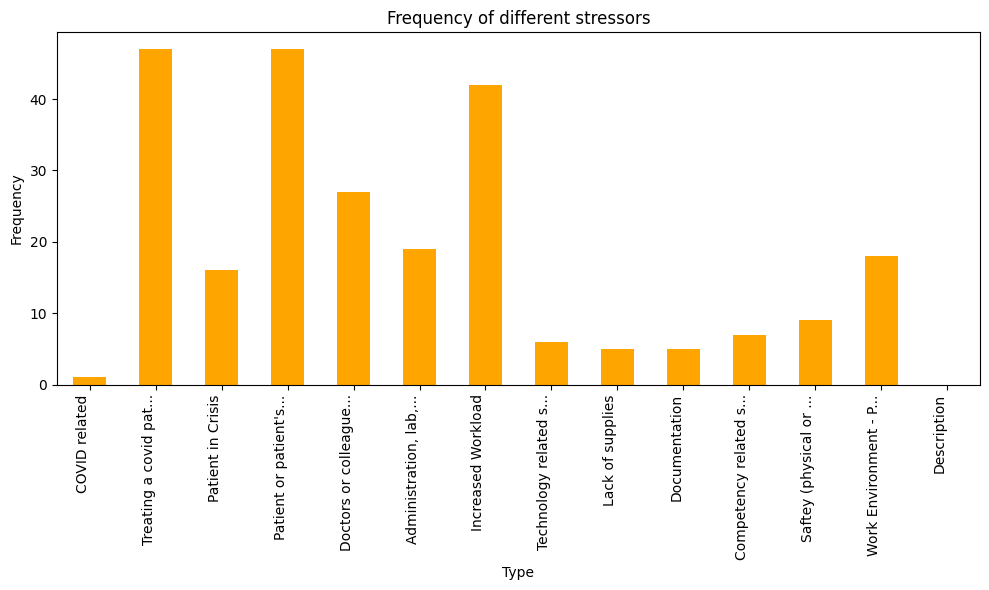

In [61]:
# Convert stressor columns to numeric explicitly
# TODO: Warning !!! At the moment it's coercing errors. Need proper method
numeric_columns = all_surveys.iloc[:, 6:].apply(pd.to_numeric, errors='coerce')

stressors = numeric_columns.sum()

plt.figure(figsize=(10, 6))
ax = stressors.plot(kind='bar', color='orange')
ax.set_title('Frequency of different stressors')
ax.set_xlabel('Type')
ax.set_ylabel('Frequency')
ax.set_xticklabels([label[:20] + '...' if len(label) > 20 else label for label in stressors.index], rotation=90, ha='right')
plt.tight_layout()
plt.show()